# NFL COMBINE PLAYER DATA ANALYSIS
Ibrahim Taher and Michael Wayne

The NFL is a statistics gloryhole: suck any given dick on any given day and your bound find statistics about the third NFL rookie black quarterback who posted greater than or equal 100 QBR. One of the biggest statistical orgies is the NFL combine, where players come to show off their athletic skill in certain events like the infamous 40 yd dash, the broad jump, the bench press, etc.

Do any of these mean anything in terms of predicting player outcomes in the NFL? What about player physical stats (height, weight, etc.?) 

The dataset that was used was found nflsavant.com/about. It had to be edited because of an overwhelming amount of zeroes and blank spaces. 

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
combine_df=pd.read_csv('combine.csv')
#combine_df = combine_df.replace(0, np.NaN)
combine_df=combine_df.drop('year',axis=1)
combine_df
      


,name,position,heightinchestotal,weight,fortyyd,twentyss,vertical,broad,bench
0,Ameer Abdullah,RB,69.0,205,4.60,3.95,42.5,130,24
1,Nelson Agholor,WR,72.0,198,4.42,0.00,0.0,0,12
2,Jay Ajayi,RB,72.0,221,4.57,4.10,39.0,121,19
3,Kwon Alexander,OLB,73.0,227,4.55,4.20,36.0,121,24
4,Mario Alford,WR,68.0,180,4.43,4.07,34.0,121,13
5,Javorius Allen,RB,72.0,221,4.53,4.28,35.5,121,11
6,Adrian Amos,FS,72.0,218,4.56,4.03,35.5,122,0
7,Dres Anderson,WR,73.0,187,0.00,0.00,0.0,0,13
8,Henry Anderson,DE,78.0,294,5.03,4.19,30.0,111,0
9,Rory 'Busta' Anderson,TE,77.0,244,0.00,0.00,0.0,0,0


In [53]:
_df=df.groupby(['year','position'],axis=0)
_df=_df.mean()
_df


heightinchestotal      weight   fortyyd  twentyss   vertical  \
year position                                                                 
1999 CB                70.538462  184.807692  4.482692  3.951923  35.615385   
     DE                75.656250  269.156250  4.884687  4.259688  29.203125   
     DT                75.333333  295.733333  5.135333  3.918333  24.866667   
     FB                72.333333  236.583333  4.702500  3.216667  33.750000   
     FS                72.882353  199.882353  4.600588  3.956471  36.294118   
     ILB               73.680000  242.840000  4.798800  3.980000  28.920000   
     OC                75.666667  304.733333  5.256000  4.663333  28.033333   
     OG                76.034483  311.724138  5.321379  4.172069  26.603448   
     OLB               74.615385  239.923077  4.746538  4.291923  32.711538   
     OT                77.843750  321.531250  5.351875  3.958437  24.109375   
     QB                74.521739  216.521739  4.839565  4.376087  32.608696   
     RB                70.533333  209.900000  4.572000  3.595333  29.666667   
     SS                72.800000  210.800000  4.571000  4.105000  36.150000   
     TE                75.782609  259.521739  4.876957  3.989130  31.652174   
     WR                72.659574  197.127660  4.566596  3.467234  35.234043   
2000 CB                71.214286  191.750000  4.516786  3.097143  30.785714   
     DE                75.588235  273.294118  4.914706  3.935294  30.558824   
     DT                75.454545  299.681818  5.117727  3.766818  26.863636   
     FB                72.888889  244.222222  4.820000  3.487778  28.444444   
     FS                72.583333  196.583333  4.581667  3.874167  30.583333   
     ILB               73.636364  245.545455  4.810000  3.512727  29.227273   
     OC                75.500000  292.500000  5.142500  2.287500  22.750000   
     OG                75.909091  310.363636  5.321818  3.707273  24.340909   
     OLB               74.176471  242.176471  4.684118  3.041176  27.647059   
     OT                77.105263  320.105263  5.378421  3.797895  22.736842   
     QB                74.333333  215.833333  4.968889  3.439444  24.472222   
     RB                71.592593  212.481481  4.587407  3.131111  29.203704   
     SS                71.400000  205.200000  4.581000  2.963000  25.100000   
     TE                76.384615  254.000000  4.818462  2.974615  27.615385   
     WR                72.862069  196.379310  4.554828  2.722414  30.431034   
...                          ...         ...       ...       ...        ...   
2014 LS                75.000000  258.000000  4.910000  0.000000  29.000000   
     NT                73.500000  323.250000  5.257500  0.000000  27.375000   
     OG                76.133333  315.400000  4.214667  3.151333  21.033333   
     OLB               74.523810  243.523810  3.838095  3.033333  30.428571   
     OT                77.478261  313.913043  4.279130  3.878261  25.043478   
     P                 75.400000  219.800000  1.906000  0.000000  11.500000   
     QB                74.631579  220.736842  4.092105  3.835263  26.815789   
     RB                70.393939  212.333333  4.301515  2.580606  32.803030   
     SS                71.818182  205.636364  3.763636  3.546364  28.500000   
     TE                76.227273  254.500000  3.245909  2.396818  24.727273   
     WR                72.458333  200.520833  4.233542  3.311042  30.958333   
2015 C                 75.444444  304.333333  2.910000  2.571111  15.500000   
     CB                71.156250  192.500000  4.102188  3.500312  32.875000   
     DE                75.913043  268.782609  4.201739  3.046957  23.565217   
     DT                75.190476  306.857143  4.365238  3.733810  25.904762   
     FB                71.000000  239.333333  3.226667  2.913333  22.166667   
     FS                72.285714  203.500000  3.594286  3.265000  27.964286   
     ILB               73.000000  240.153846  4.371538  3.296154 

In [54]:
c_df=combine_df[combine_df['position']=='C']
cb_df=combine_df[combine_df['position']=='CB']
de_df=combine_df[combine_df['position']=='DE']
dt_df=combine_df[combine_df['position']=='DT']
fb_df=combine_df[combine_df['position']=='FB']
fs_df=combine_df[combine_df['position']=='FS']
ilb_df=combine_df[combine_df['position']=='ILB']
k_df=combine_df[combine_df['position']=='K']
ls_df=combine_df[combine_df['position']=='LS']
nt_df=combine_df[combine_df['position']=='NT']
og_df=combine_df[combine_df['position']=='OG']
rb_df=combine_df[combine_df['position']=='RB']
olb_df=combine_df[combine_df['position']=='OLB']
ot_df=combine_df[combine_df['position']=='OT']
p_df=combine_df[combine_df['position']=='P']
qb_df=combine_df[combine_df['position']=='QB']
rb_df=combine_df[combine_df['position']=='RB']
ss_df=combine_df[combine_df['position']=='SS']
te_df=combine_df[combine_df['position']=='TE']
wr_df=combine_df[combine_df['position']=='WR']

    

In [67]:
olb_df=olb_df.drop('position',axis=1)


ValueError: labels ['position'] not contained in axis

In [68]:
olb_df

,name,heightinchestotal,weight,fortyyd,twentyss,vertical,broad,bench
3,Kwon Alexander,73.0,227,4.55,4.20,36.0,121,24
13,Neiron Ball,74.0,236,0.00,0.00,0.0,0,22
16,Vic Beasley,75.0,246,4.53,4.15,41.0,130,35
68,Yannik Cudjoe-Virgil,74.0,248,0.00,0.00,0.0,0,25
71,Aaron Davis,72.0,225,4.95,4.37,29.0,107,16
82,Xzavier Dickson,75.0,260,4.74,4.53,29.5,100,19
91,B.J. Dubose,76.0,284,5.06,0.00,0.0,0,26
92,Bud Dupree,76.0,269,4.56,0.00,42.0,138,0
97,Kyle Emanuel,75.0,255,4.77,4.25,34.0,120,27
109,Dante Fowler,75.0,261,4.60,4.32,32.5,112,19


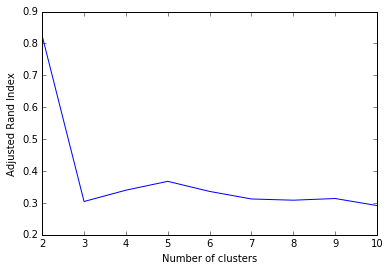

In [63]:
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    
sc_evaluate_clusters(olb_df.drop('name',axis=1),10)#7 clusters

In [65]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)#due to sihlouette coefficient
kmeans.fit_predict(olb_df.drop('name',axis=1)) 

array([4, 1, 0, 1, 4, 0, 1, 3, 0, 0, 4, 4, 3, 4, 3, 1, 1, 0, 1, 0, 4, 4, 0,
       3, 0, 3, 0, 1, 0, 4, 0, 4, 4, 3, 0, 4, 2, 0, 0, 4, 4, 1, 4, 0, 0, 0,
       4, 0, 4, 4, 4, 2, 0, 1, 1, 4, 4, 2, 2, 0, 4, 4, 2, 4, 0, 4, 4, 4, 3,
       0, 4, 4, 4, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 0, 0, 1, 0, 4, 4, 4, 1, 1,
       4, 0, 0, 0, 1, 0, 3, 0, 0, 4, 4, 0, 4, 3, 0, 0, 0, 4, 3, 0, 4, 4, 4,
       4, 0, 4, 0, 4, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 4, 4, 3, 3, 0, 0,
       3, 3, 3, 1, 0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 4, 1,
       4, 4, 1, 2, 4, 2, 0, 3, 3, 0, 0, 4, 0, 0, 0, 3, 0, 4, 0, 0, 4, 0, 3,
       1, 0, 1, 4, 0, 1, 4, 4, 4, 3, 4, 2, 4, 0, 4, 4, 4, 3, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 0, 4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 3, 4, 0, 3, 1, 1, 4, 4, 4, 3, 4, 0, 4, 1, 0, 0, 4, 4, 1, 4,
       0, 4, 4, 1, 1, 4, 3, 1, 4, 0, 4, 4, 2, 2, 1, 1, 3, 4, 1, 3, 0, 4, 4,
       4, 3, 4, 4, 4, 3, 1, 0, 0, 4, 4, 4, 0, 0, 4, 3, 1, 4, 3, 1, 0, 0, 0,
       4, 0,

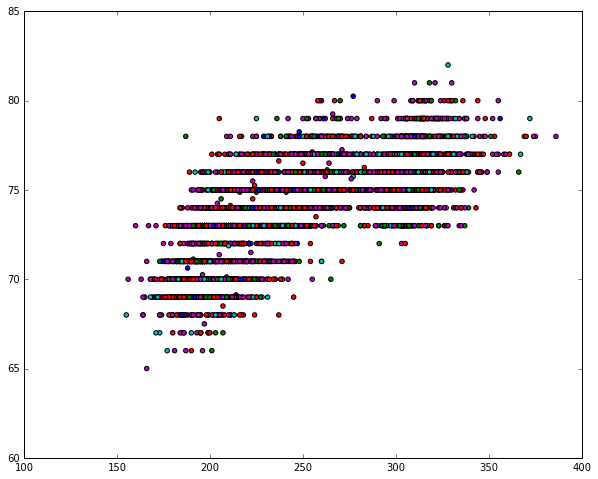

In [66]:
labels = kmeans.labels_
cols = [['r','g','b','c','m','y','k'][l] for l in labels]
plt.figure(figsize=(10, 8))
plt.scatter(df['weight'],df['heightinchestotal'],c=cols,alpha=1)